In [1]:
'''
Parasocial Attachment, Gender, and Personality 

Audiences often form “parasocial relationships” (i.e., one-sided emotional bonds 
with media figures such as influencers, journalists, or entertainers) that may fulfill 
social and psychological needs traditionally associated with interpersonal 
relationships. The strength of such attachments can vary across both social identity 
and personality traits that shape how individuals relate to others. Using the dataset 
“mediaattachment.csv”, first investigate how the intensity of parasocial attachment 
differs by gender. Then, extend your analysis by testing whether attachment 
intensity varies systematically across the four personality types. How might these 
findings enhance understanding of how individual differences (e.g., gender and 
personality) independently shape emotional engagement with media figures in 
contemporary mediated environments? 


Variables in “mediaattachment.csv” 

 gender: 1 Male; 2 Female - parasocial: 0–100 scale measuring perceived emotional closeness to a favorite media figure; 
         998 Don’t know; 999 Refused; –1 Not applicable 

personality: 1 Analyst; 2 Diplomat; 3 Sentinel; 4 Explorer; 98 Don’t know; 99 Refused
'''

'\nParasocial Attachment, Gender, and Personality \n\nAudiences often form “parasocial relationships” (i.e., one-sided emotional bonds \nwith media figures such as influencers, journalists, or entertainers) that may fulfill \nsocial and psychological needs traditionally associated with interpersonal \nrelationships. The strength of such attachments can vary across both social identity \nand personality traits that shape how individuals relate to others. Using the dataset \n“mediaattachment.csv”, first investigate how the intensity of parasocial attachment \ndiffers by gender. Then, extend your analysis by testing whether attachment \nintensity varies systematically across the four personality types. How might these \nfindings enhance understanding of how individual differences (e.g., gender and \npersonality) independently shape emotional engagement with media figures in \ncontemporary mediated environments? \n\n\nVariables in “mediaattachment.csv” \n\n gender: 1 Male; 2 Female - paras

In [2]:
'''
This research task has a continuous scale (0~100) for the dependent variable (Parasocial Attachment) 
and categorical variables (Nominal) for the independent variables (Gender, Personality), 
so Mean Comparison Analysis methodology should be primarily applied.

The given research task requires hypothesis testing in two stages and integrated interpretation, 
and the core methodologies appropriate for this are T-test and Analysis of Variance (ANOVA).
'''

'\nThis research task has a continuous scale (0~100) for the dependent variable (Parasocial Attachment) \nand categorical variables (Nominal) for the independent variables (Gender, Personality), \nso Mean Comparison Analysis methodology should be primarily applied.\n\nThe given research task requires hypothesis testing in two stages and integrated interpretation, \nand the core methodologies appropriate for this are T-test and Analysis of Variance (ANOVA).\n'

### 0. Load Data

In [3]:
import pandas as pd

df = pd.read_csv('mediaattachment.csv')
df.head()

,gender,personality,parasocial,age,mediahours,education,income,platformuse
0,2,1,29,26,3.7,2,2,3.7
1,1,2,49,53,1.4,3,2,1.9
2,2,2,-1,42,5.0,1,2,998.0
3,2,4,39,48,1.7,3,3,1.9
4,2,3,56,41,0.8,2,1,0.0


### 1. Data Preprocessing

In [4]:
import numpy as np

print(f"Original data size: {df.shape}")

df_clean = df.copy()
df_clean['parasocial'] = df_clean['parasocial'].replace([-1, 998, 999], np.nan)
df_clean['personality'] = df_clean['personality'].replace([98, 99], np.nan)
df_clean['gender'] = df_clean['gender'].replace([99, 999], np.nan)
df_clean = df_clean.dropna(subset=['parasocial', 'personality', 'gender'])

print(f"After preprocessing data size: {df_clean.shape}")
print(f"Number of removed data: {df.shape[0] - df_clean.shape[0]}")

Original data size: (950, 8)
After preprocessing data size: (903, 8)
Number of removed data: 47


### 2. Testing Attachment Intensity Differences by Gender (T-test)

#### 2-1. Levene's test

In [5]:
import scipy.stats as stats
import numpy as np, statsmodels.stats.api as sms

# Separate parasocial data by gender
male_parasocial = df_clean[df_clean['gender'] == 1]['parasocial']
female_parasocial = df_clean[df_clean['gender'] == 2]['parasocial']

# Test for equal variance (Levene's Test)
levene_test = stats.levene(male_parasocial, female_parasocial)
print("=== Levene's Test (Equal Variance Test) ===")
print(levene_test)

# Descriptive statistics
print("\n=== Descriptive Statistics ===")
df_clean.groupby('gender')[['parasocial']].describe()

=== Levene's Test (Equal Variance Test) ===
LeveneResult(statistic=np.float64(0.13355395336271014), pvalue=np.float64(0.7148610419504602))

=== Descriptive Statistics ===


parasocial                                                     
            count       mean        std   min    25%   50%   75%   max
gender                                                                
1           429.0  50.335664  11.972873   8.0  43.00  50.0  58.0  87.0
2           474.0  54.938819  11.473402  19.0  46.25  55.0  63.0  87.0

#### 2-2. T-test with Equal Variance Assumption

In [6]:
# 95% confidence interval (equal variance assumption)
conf = sms.CompareMeans(sms.DescrStatsW(male_parasocial), sms.DescrStatsW(female_parasocial))
conf_int = conf.tconfint_diff(usevar='pooled')
print("=== 95% Confidence Interval (Equal Variance Assumption) ===")
print(conf_int)

# Independent sample T-test (equal variance assumption)
ind_ttest = stats.ttest_ind(male_parasocial, female_parasocial, equal_var=True)
print("\n=== Independent Sample T-test (Equal Variance Assumption) ===")
print(ind_ttest)

# Interpret results
alpha = 0.05
print(f"\n=== Result Interpretation (Significance level α = {alpha}) ===")
if ind_ttest.pvalue < alpha:
    print(f"P-value ({ind_ttest.pvalue:.4f}) < α ({alpha}) → Reject null hypothesis")
    print("Conclusion: There is a statistically significant difference in average attachment intensity between males and females.")
else:
    print(f"P-value ({ind_ttest.pvalue:.4f}) >= α ({alpha}) → Accept null hypothesis")
    print("Conclusion: There is no statistically significant difference in average attachment intensity between males and females.")

=== 95% Confidence Interval (Equal Variance Assumption) ===
(np.float64(-6.135080856843518), np.float64(-3.071227602629503))

=== Independent Sample T-test (Equal Variance Assumption) ===
TtestResult(statistic=np.float64(-5.897248703512085), pvalue=np.float64(5.223648176913488e-09), df=np.float64(901.0))

=== Result Interpretation (Significance level α = 0.05) ===
P-value (0.0000) < α (0.05) → Reject null hypothesis
Conclusion: There is a statistically significant difference in average attachment intensity between males and females.


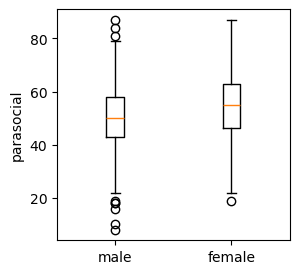

In [7]:
# 시각화 - boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3)) 
plt.boxplot((male_parasocial, female_parasocial))
plt.ylabel("parasocial") # y-axis label
plt.xticks([1, 2], ['male', 'female']) # set x-axis labels
plt.show() # Show the plot

### 3. Testing Attachment Intensity Differences by Personality Type (One-Way ANOVA)

#### 3-1. One-Way ANOVA

In [8]:
# Descriptive statistics by personality type
print("=== Descriptive Statistics by Personality Type ===")
df_clean.groupby('personality')[['parasocial']].describe()

=== Descriptive Statistics by Personality Type ===


parasocial                                                    
                 count       mean        std   min   25%   50%   75%   max
personality                                                               
1                186.0  45.967742  11.564112   8.0  39.0  45.5  54.0  84.0
2                254.0  56.480315  10.648795  27.0  49.0  56.0  63.0  87.0
3                227.0  52.898678  11.385962  22.0  45.5  52.0  61.0  87.0
4                236.0  53.944915  11.891403  10.0  46.0  53.5  62.0  87.0

In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Separate data by personality type (1=Analyst, 2=Diplomat, 3=Sentinel, 4=Explorer)
# This part may not be necessary - statsmodels uses the entire dataframe

# Convert personality to categorical variable and assign labels
df_clean['personality'] = df_clean['personality'].astype('category')
df_clean['personality'] = df_clean['personality'].cat.rename_categories({
    1: 'Analyst', 
    2: 'Diplomat', 
    3: 'Sentinel', 
    4: 'Explorer'
})

# One-Way ANOVA
oneway = ols('parasocial ~ C(personality)', data=df_clean).fit()
anova_table = sm.stats.anova_lm(oneway)
print("=== One-Way ANOVA ===")
print(anova_table)

# Interpret results
alpha = 0.05
p_value = anova_table['PR(>F)'][0]

print(f"\n=== Result Interpretation (Significance level α = {alpha}) ===")
if p_value < alpha:
    print(f"P-value ({p_value:.4f}) < α ({alpha}) → Reject null hypothesis")
    print("Conclusion: There is a statistically significant difference in average parasocial attachment intensity according to personality type.")
else:
    print(f"P-value ({p_value:.4f}) >= α ({alpha}) → Accept null hypothesis")
    print("Conclusion: There is no statistically significant difference in average parasocial attachment intensity according to personality type.")

=== One-Way ANOVA ===
                   df         sum_sq      mean_sq          F        PR(>F)
C(personality)    3.0   12432.272580  4144.090860  32.128292  9.877088e-20
Residual        899.0  115958.161528   128.985719        NaN           NaN

=== Result Interpretation (Significance level α = 0.05) ===
P-value (0.0000) < α (0.05) → Reject null hypothesis
Conclusion: There is a statistically significant difference in average parasocial attachment intensity according to personality type.


C:\Users\16Z90P\AppData\Local\Temp\ipykernel_33112\3937590804.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


#### 3-2. Tukey's HSD

In [10]:
# Post-hoc analysis (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(df_clean['parasocial'], df_clean['personality'], alpha=0.05)
tukey_summary = tukey_result.summary()
print(tukey_summary)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 Analyst Diplomat  10.5126    0.0  7.6916 13.3336   True
 Analyst Explorer   7.9772    0.0   5.111 10.8433   True
 Analyst Sentinel   6.9309    0.0  4.0399   9.822   True
Diplomat Explorer  -2.5354 0.0655 -5.1783  0.1075  False
Diplomat Sentinel  -3.5816 0.0033 -6.2515 -0.9117   True
Explorer Sentinel  -1.0462 0.7547 -3.7638  1.6713  False
--------------------------------------------------------


### 4. Integrated Interpretation: Two-Way ANOVA

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit Two-Way ANOVA model
model = ols('parasocial ~ C(gender) + C(personality) + C(gender):C(personality)', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== Two-Way ANOVA Results ===")
print(anova_table)

# Interpret results
alpha = 0.05
print(f"\n=== Result Interpretation (Significance level α = {alpha}) ===")

# Gender main effect
gender_p = anova_table.loc['C(gender)', 'PR(>F)']
print(f"\n1. Gender Main Effect P-value:", gender_p)
if gender_p < alpha:
    print(f"   P-value ({gender_p:.4f}) < α → Significant")
    print(f"   → Gender has an independent effect on parasocial attachment intensity.")
else:
    print(f"   P-value ({gender_p:.4f}) >= α → Not significant")

# Personality type main effect
personality_p = anova_table.loc['C(personality)', 'PR(>F)']
print(f"\n2. Personality Type Main Effect P-value:", personality_p)
if personality_p < alpha:
    print(f"   P-value ({personality_p:.4f}) < α → Significant")
    print(f"   → Personality type has an independent effect on parasocial attachment intensity.")
else:
    print(f"   P-value ({personality_p:.4f}) >= α → Not significant")

# Interaction effect
interaction_p = anova_table.loc['C(gender):C(personality)', 'PR(>F)']
print(f"\n3. Interaction Effect P-value:", interaction_p)
if interaction_p < alpha:
    print(f"   P-value ({interaction_p:.4f}) < α → Significant")
    print(f"   → There is an interaction between gender and personality type.")
else:
    print(f"   P-value ({interaction_p:.4f}) >= α → Not significant")
    print(f"   → There is no interaction between gender and personality type.")

=== Two-Way ANOVA Results ===
                                 sum_sq     df          F        PR(>F)
C(gender)                   5071.228022    1.0  40.993689  2.462446e-10
C(personality)             12731.956568    3.0  34.306606  5.427172e-21
C(gender):C(personality)     168.694731    3.0   0.454553  7.141405e-01
Residual                  110718.238775  895.0        NaN           NaN

=== Result Interpretation (Significance level α = 0.05) ===

1. Gender Main Effect P-value: 2.4624459660845473e-10
   P-value (0.0000) < α → Significant
   → Gender has an independent effect on parasocial attachment intensity.

2. Personality Type Main Effect P-value: 5.427171509434457e-21
   P-value (0.0000) < α → Significant
   → Personality type has an independent effect on parasocial attachment intensity.

3. Interaction Effect P-value: 0.7141404850773879
   P-value (0.7141) >= α → Not significant
   → There is no interaction between gender and personality type.
